In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import numpy as np
import base64

In [ ]:
# Constants to be used throughout app
# Do not change these values!
# That means you!
ID = 'GREG-API_6E705F16'
TOKEN = 'c853838be3dc97a0'
URL = 'https://customer.api.soundcharts.com'
HEADERS = 'headers = {"x-app-id": "GREG-API_6E705F16", "x-api-key": "c853838be3dc97a0"}'

In [ ]:
# Spotify API Info
# Run this cell to obtain token
# token expires after one hour
# RUN THIS CELL IF TOKEN EXPIRES 
# Your client ID and client secret, which can be obtained from the
# Spotify Developer website
CLIENT_ID = <-Client ID here->
CLIENT_SECRET = <-Password here->

# The redirect URI that you specified when registering your application
REDIRECT_URI = "http://google.com/"

# The authorization URL for the Spotify API
AUTH_URL = "https://accounts.spotify.com/authorize"

# Step 1 - Authorization 
url = "https://accounts.spotify.com/api/token"
headers = {}
data = {}

# Encode as Base64
message = f"{CLIENT_ID}:{CLIENT_SECRET}"
messageBytes = message.encode('ascii')
base64Bytes = base64.b64encode(messageBytes)
base64Message = base64Bytes.decode('ascii')


headers['Authorization'] = f"Basic {base64Message}"
data['grant_type'] = "client_credentials"

r = requests.post(url, headers=headers, data=data)

token = r.json()['access_token']


In [ ]:
chart = requests.get('https://customer.api.soundcharts.com/api/v2.14/chart/song/global-28/ranking/latest?offset=0&limit=10',
                    headers = {"x-app-id": "GREG-API_6E705F16", 
                            "x-api-key": "c853838be3dc97a0"})
chart_dict = chart.json()
with open("chart_sample.json", "w") as outfile:
    json.dump(chart_dict, outfile)

# chart_dict['items']
chart_df = pd.json_normalize(chart_dict['items'], max_level=1)
chart_df.head()


In [ ]:
# Chart rankings by platform
# /api/v2/song/{uuid}/charts/ranks/{platform}
radio_ranking = requests.get('https://customer.api.soundcharts.com/api/v2/song/58f384dd-eedd-4b95-932d-42d3ff177795/charts/ranks/spotify',
                    headers = {"x-app-id": "GREG-API_6E705F16", 
                            "x-api-key": "c853838be3dc97a0"})

radio_ranking_dict = radio_ranking.json()

radio_ranking_dict

In [ ]:
# Song chart list
# /api/v2/chart/song/by-platform/{platform}?countryCode=BR&offset=0&limit=100
chart_list_URL = '/api/v2/chart/song/by-platform/airplay?countryCode=PT&offset=0&limit=100'
song_chart_list = requests.get(URL + chart_list_URL, 
                            headers = {"x-app-id": ID, "x-api-key": TOKEN})
song_chart_list_dict = song_chart_list.json()
song_chart_list_get = song_chart_list_dict["page"]["next"]
#with open("song_chart_list.json", "w") as outfile:
#    json.dump(song_chart_list_dict, outfile)
song_chart_list_get
song_chart_listing = pd.DataFrame.from_dict(song_chart_list_dict['items'])
song_chart_listing.head(30)

In [ ]:
spotify_chart_list_URL = '/api/v2/chart/song/by-platform/airplay?countryCode=BR&offset=0&limit=100'
spotify_chart_list = requests.get(URL + spotify_chart_list_URL, 
                            headers = {"x-app-id": ID, "x-api-key": TOKEN})
spotify_chart_list_dict = spotify_chart_list.json()
spotify_chart_list_dict

In [ ]:
# Available ranking dates
# GET /api/v2/chart/song/{slug}/available-rankings
# Test slug: airplay-daily-br	(All stations in Brazil)
ranking_dates_url = '/api/v2/chart/song/airplay-daily-pt/available-rankings'
ranking_dates_list = requests.get(URL + ranking_dates_url + '?offset=0&limit=40', 
                            headers = {"x-app-id": ID, "x-api-key": TOKEN})
ranking_dates_list_dict = ranking_dates_list.json()
#ranking_dates_list_get = ranking_dates_list_dict["page"]["next"]
#with open("ranking_dates_list.json", "w") as outfile:
#    json.dump(ranking_dates_list_dict, outfile)
ranking_dates_list_dict

In [ ]:
# getting Spotify ID for a song with Soundcharts UUID
test_song_id = '39fdb751-d3a7-4b2d-a4b5-50075d4ca086'
get_spotify_stream_count = '/api/v2.24/song/39fdb751-d3a7-4b2d-a4b5-50075d4ca086/spotify/stream'
spotify_stream_count = requests.get(URL + get_spotify_stream_count,
                                    headers = {"x-app-id": ID, "x-api-key": TOKEN})
spotify_stream_count_dict = spotify_stream_count.json()
spotify_stream_count_dict

In [ ]:
def all_songs_uuids_and_spotify_ids():
  """
  This function will list all songs that charted along with their corresponding Soundcharts UUIDs and Spotify IDs.

  Output: dataframe of songs and UUIDs
  """
  date_list = ['2022-12-08', '2022-12-09', '2022-12-10', '2022-12-11', '2022-12-12', '2022-12-13', '2022-12-14',
               '2022-12-15', '2022-12-16', '2022-12-17', '2022-12-18', '2022-12-19']

  slug_list = ['airplay-daily-nl', 'airplay-daily-ar', 'airplay-daily-hr', 'airplay-daily-br', 'airplay-daily-fr', 'airplay-daily-gb',
                'airplay-daily-ma', 'airplay-daily-pt']
  spotify_ids = []
  countries = []
  chart_count = 10
  master_song_list = pd.DataFrame(columns = ['song.uuid', 'song.name', 'song.creditName', 'position', 'rankDate'])
  for slug in slug_list:
    for date in date_list:
      chart_slug = slug
      chart_date = date
      i = 1
      while i <= chart_count:
        countries.append(slug[-2:].upper())
        i += 1
      song_chart_date_url = '/api/v2.14/chart/song/' + chart_slug + '/ranking/' + chart_date + 'T12:00:00+00:00'
      song_chart_date_list = requests.get(URL + song_chart_date_url + '?offset=0&limit=' + str(chart_count), 
                                  headers = {"x-app-id": ID, "x-api-key": TOKEN})
      song_chart_date_dict = song_chart_date_list.json()
      #pull song info into dataframe
      song_data = pd.json_normalize(song_chart_date_dict["items"])
      uuids_of_songs = song_data[['song.uuid', 'song.name', 'song.creditName', 'position', 'rankDate']]
      country_frame = pd.Series(countries)
      master_song_list = pd.concat([master_song_list, uuids_of_songs], ignore_index=True)
  master_song_list['countryName'] = country_frame
  
  #now that we have uuids, use those to get Spotify IDs
  for song in master_song_list['song.uuid']:
    stream_count = requests.get(URL + '/api/v2.24/song/' + song + '/spotify/stream', 
                                  headers = {"x-app-id": ID, "x-api-key": TOKEN})
    if stream_count.status_code == 200:
      stream_count_dict = stream_count.json()
      if stream_count_dict['items']:
        song_spotify_id = stream_count_dict['items'][0]['plots'][0]['identifier']
        spotify_ids.append(song_spotify_id)
      else:
        spotify_ids.append(np.nan)
    else:
      spotify_ids.append(np.nan)
  master_song_list['spotify_id'] = spotify_ids
  master_song_list = master_song_list.replace({'countryName': {'NL': 'Netherlands', 'AR': 'Argentina', 'HR': 'Croatia', 'BR': 'Brazil', 'FR': 'France', 'GB': 'Great Britain', 
                                    'MA': "Morocco", 'PT': 'Portugal'}})
  return master_song_list

top_charts = all_songs_uuids_and_spotify_ids()

In [ ]:
top_charts.head(15)

In [ ]:
# Get Spotify stream count (which includes Spotify ID)
# GET /api/v2.24/song/{uuid}/spotify/stream
test_uuid = '8672e4f6-7f52-4231-b2b1-e947a8e914d9'
stream_get_url = '/api/v2.24/song/8672e4f6-7f52-4231-b2b1-e947a8e914d9/spotify/stream'
stream_count = requests.get(URL + stream_get_url, 
                                  headers = {"x-app-id": ID, "x-api-key": TOKEN})
stream_count_dict = stream_count.json()
#test_id = stream_count_dict['items'][0]['plots'][0]['identifier']
#test_id
stream_count_dict

{'errors': [{'key': 'argument',
   'code': 404,
   'message': 'No data found for song uuid 8672e4f6-7f52-4231-b2b1-e947a8e914d9'}]}

In [ ]:
"""
Done on 12/28: sweet_sixteen_charts function created to get json of charts
To Do on 12/29: 
- write json to dataframes (each chart = a new dataframe?)
- get data to csv
- get list of unique UUIDs
- use UUIDs to retrieve Spotify IDs
---------------------
Done on 12/29: wrote code block to generate json and csv files, but get an error in function, 
posted to StackOverflow
To Do on 12/30: 
- resolve bug
- get list of unique UUIDs
- retrieve Spotify IDs
--------------------
Done on 12/30: resolved bug to generate json and csv files, wrote all_songs_uuids function
to get Soundcharts UUIDs of songs played (will probably need to adjust scope of charts)
To Do:
- retrieve Spotify IDs
-----
Done on 1/2: wrote function to retrieve Spotify IDs, now need to figure out the Spotify API
to make calls and get song info
--------
1/4: Completed Spotify API call
--------
1/5: Completed error handling for Soundcharts, completed Spotify API call for multiple tracks
TO DO: finalize country and date parameters, clean up final dataframe
"""


In [ ]:
track_list = top_charts['spotify_id'].dropna()
track_list = track_list.drop_duplicates()

track_list = track_list.reset_index(drop=True)
track_list
#test_songs = ','.join(track_list)
#test_songs

0      57LY0Am41EiUqttO8XqAGj
1      4zrKN5Sv8JS5mqnbVcsul7
2      28fYWYOi6AD1cKzkFBE9Ip
3      4fWyBvLIPO68D2Ff87t1em
4      2KitOzLBUFdW4vB2aHeQri
                ...          
128    6qlwlp04BFPp50XXv2gaXt
129    5bBQI31u2eqXJE5OyP4hxq
130    0oKpBxCq4U5IvUZqMuVMM3
131    6xGruZOHLs39ZbVccQTuPZ
132    5IgjP7X4th6nMNDh4akUHb
Name: spotify_id, Length: 133, dtype: object

In [ ]:
#len(track_list)
print(track_list[len(track_list)-1])

first_hundred_ids = track_list[:100]
first_hundred_ids

remaining_ids = track_list[-33:]
remaining_ids

hundred_track_ids = ','.join(first_hundred_ids)
type(hundred_track_ids)

last_ids = ','.join(remaining_ids)
type(last_ids)


5IgjP7X4th6nMNDh4akUHb


str

In [ ]:

track_url = 'https://api.spotify.com/v1/audio-features?ids='

headers = {
    "Authorization": "Bearer " + token
}

first_hundred_tracks = requests.get(url=track_url + hundred_track_ids, headers=headers)
#first_hundred_tracks.status_code
first_hundred_track_dict = first_hundred_tracks.json()
#first_hundred_track_dict
first_hundred_track_info = pd.json_normalize(first_hundred_track_dict['audio_features'])
first_hundred_track_info = first_hundred_track_info.drop(columns=['mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
first_hundred_track_info = first_hundred_track_info.rename(columns={"id": "spotify_id"})

# time for the rest of the list
remaining_tracks = requests.get(url=track_url + last_ids, headers=headers)
remaining_track_dict = remaining_tracks.json()
#first_hundred_track_dict
remaining_track_info = pd.json_normalize(remaining_track_dict['audio_features'])
remaining_track_info = remaining_track_info.drop(columns=['mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
remaining_track_info = remaining_track_info.rename(columns={"id": "spotify_id"})

remaining_track_info
frames = [first_hundred_track_info, remaining_track_info]
track_info = pd.concat(frames,ignore_index=True)

track_info

,danceability,energy,key,loudness,valence,tempo,spotify_id
0,0.716,0.511,1,-6.257,0.324,104.964,57LY0Am41EiUqttO8XqAGj
1,0.574,0.852,2,-1.248,0.501,123.038,4zrKN5Sv8JS5mqnbVcsul7
2,0.561,0.965,7,-3.673,0.304,128.040,28fYWYOi6AD1cKzkFBE9Ip
3,0.748,0.579,1,-8.046,0.625,127.974,4fWyBvLIPO68D2Ff87t1em
4,0.647,0.841,9,-4.870,0.726,123.908,2KitOzLBUFdW4vB2aHeQri
...,...,...,...,...,...,...,...
128,0.780,0.689,7,-5.668,0.642,115.042,6qlwlp04BFPp50XXv2gaXt
129,0.794,0.619,2,-5.636,0.183,98.050,5bBQI31u2eqXJE5OyP4hxq
130,0.440,0.347,6,-8.369,0.134,172.593,0oKpBxCq4U5IvUZqMuVMM3
131,0.440,0.317,8,-9.258,0.268,169.914,6xGruZOHLs39ZbVccQTuPZ


In [ ]:
final_chart = pd.merge(top_charts, track_info, on='spotify_id', how='outer')
final_chart = final_chart.sort_values(by = ['countryName', 'rankDate', 'position'], ascending=[True, True, True], ignore_index=True)
final_chart
world_cup_countdown = final_chart.groupby(['song.name'])['song.name'].count()
world_cup_countdown = world_cup_countdown.sort_values(ascending=False)
#type(world_cup_countdown)
world_cup_countdown

NameError: ignored

In [ ]:
chart_of_charts = final_chart.dropna()
chart_of_charts.head(1)


,song.uuid,song.name,song.creditName,position,rankDate,countryName,spotify_id,danceability,energy,key,loudness,valence,tempo
0,e685f5ec-001b-4af6-8e45-27d5e418b006,Underground,Emilia,1,2022-12-08T12:00:00+00:00,Argentina,3QWCxOv2YharMus6KbfiPJ,0.803,0.818,4.0,-3.232,0.82,90.999


In [ ]:
#country_countdown = pd.DataFrame(columns = ['countryName', 'song.name', 'count'])
country_countdown = chart_of_charts[['countryName', 'song.name',]].copy()
country_countdown['song.creditName'] = ''
country_countdown['count'] = ''
country_countdown = country_countdown.groupby(['countryName', 'song.name']).count()
country_countdown = country_countdown.reset_index()
country_countdown = country_countdown.sort_values(by=['countryName', 'count'], ascending=[True, False])
country_countdown

In [ ]:
#countdown_chart = world_cup_countdown.to_frame()
countdown_chart = countdown_chart.rename(columns={'song.name':'name', 'song.name':'count'})
countdown_chart

In [ ]:
christmas_list = ['Merry Christmas', 'Santa Tell Me', 'Last Christmas', 'Snowman', 'All I Want for Christmas Is You',
                  'I Wish It Could Be Christmas Every Day', 'Merry Christmas Everybody', 'Driving Home for Christmas',
                  'Do They Know It\'s Christmas', 'Wonderful Christmastime  - Remastered 2011 / Edited Version',
                  'You Make It Feel Like Christmas', 'Merry Christmas Everyone', 'We Wish You a Merry Christmas (Instrumental)']
'''
# Create a dataframe
df = pd.DataFrame({'A': ['apple', 'banana', 'orange', 'banana', 'apple']})

# Create a list of strings
strings = ['apple', 'banana']

# Find the number of instances of the strings in column 'A'
count = df['A'].str.contains('|'.join(strings)).sum()

print(count)

'''
xmas_count = final_chart['song.name'].str.contains('|'.join(christmas_list)).sum()
xmas_count
len(final_chart.index)
x = 62/960
x

<ipython-input-20-2d8ea5a557e6>:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  xmas_count = final_chart['song.name'].str.contains('|'.join(christmas_list)).sum()


0.06458333333333334

In [ ]:
avg_chart = chart_of_charts.groupby(["rankDate", "countryName"]).mean()
avg_chart.reset_index(level='countryName', inplace=True)
avg_chart.index = pd.to_datetime(avg_chart.index).strftime('%b %d')
avg_chart

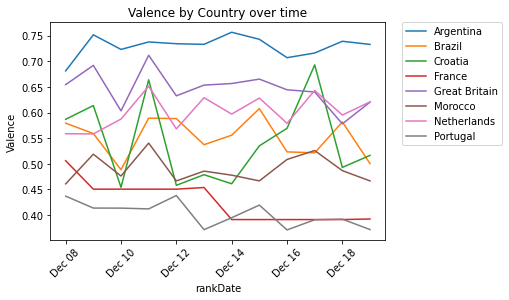

In [ ]:
avg_chart.groupby('countryName')['valence'].plot(legend=True, rot=45)
plt.xlabel('rankDate')
plt.ylabel('Valence')
plt.title('Valence by Country over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.xticks('rankDate', rotation=45)
#plt.show()
plt.savefig('valence.png', bbox_inches='tight', pad_inches=0.5)

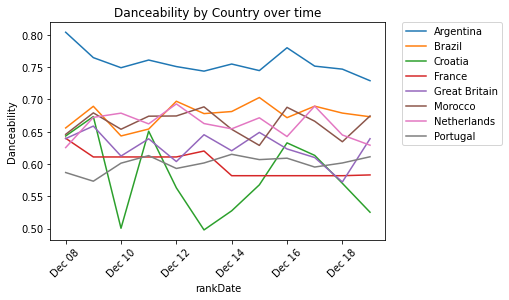

In [ ]:
avg_chart.groupby('countryName')['danceability'].plot(legend=True, rot=45)
plt.xlabel('rankDate')
plt.ylabel('Danceability')
plt.title('Danceability by Country over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.show()
plt.savefig('danceability.png', bbox_inches='tight', pad_inches=0.5)

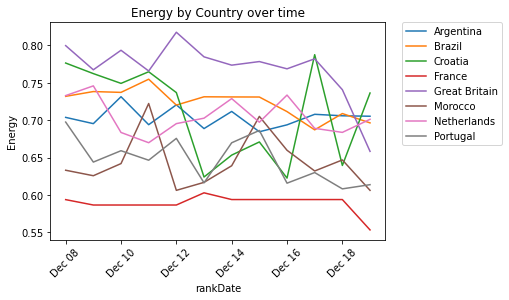

In [ ]:
avg_chart.groupby('countryName')['energy'].plot(legend=True, rot=45)
plt.xlabel('rankDate')
plt.ylabel('Energy')
plt.title('Energy by Country over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.show()
plt.savefig('energy.png', bbox_inches='tight', pad_inches=0.5)

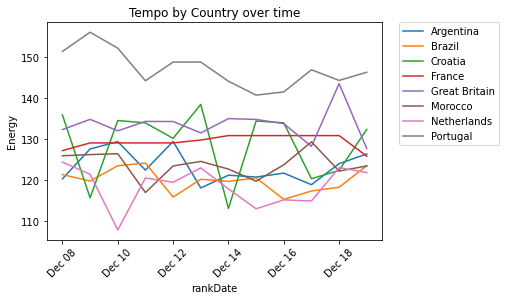

In [ ]:
avg_chart.groupby('countryName')['tempo'].plot(legend=True, rot=45)
plt.xlabel('rankDate')
plt.ylabel('Energy')
plt.title('Tempo by Country over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.show()
plt.savefig('tempo.png', bbox_inches='tight', pad_inches=0.5)

In [ ]:
argentina_results = avg_chart[avg_chart['countryName'] == 'Argentina']
#dummy_row = pd.DataFrame[{'countryName': 'Argentina', 'danceability':'0', 'energy':'0',	'key':'0', 'loudness':'0', 'valence':'0', 'tempo':'0'}]
#argentina_results = pd.concat([dummy_row, argentina_results]).reset_index(drop=True)
argentina_results = argentina_results.shift(periods=1).shift(-1, freq='D')
argentina_results = argentina_results

argentina_results['dance_change'] = argentina_results['danceability'].pct_change()*100
argentina_results['energy_change'] = argentina_results['energy'].pct_change()*100
argentina_results['valence_change'] = argentina_results['valence'].pct_change()*100
argentina_results['tempo_change'] = argentina_results['tempo'].pct_change()*100

argentina_results